In [1]:
import numpy as np
import pandas as pd

# PRE-PROCESSING

In [2]:
# Read the data
df=pd.read_csv('Fraud.csv')
# Shape the data
df.shape

(4152610, 11)

In [3]:

# Get head of the data
df.head(200)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
195,1,CASH_OUT,210370.09,C2121995675,0.0,0.00,C1170794006,1442298.03,22190.99,0.0,0.0
196,1,CASH_OUT,36437.06,C2120063568,0.0,0.00,C1740000325,154606.00,1363368.51,0.0,0.0
197,1,CASH_OUT,82691.56,C1620409359,0.0,0.00,C248609774,657983.89,6453430.91,0.0,0.0
198,1,CASH_OUT,338767.10,C691691381,0.0,0.00,C453211571,544481.28,3461666.05,0.0,0.0


In [4]:

df.tail(200)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4152410,303,TRANSFER,148068.70,C782434860,0.0,0.00,C1801833380,3049586.69,3197655.39,0.0,0.0
4152411,303,TRANSFER,2719955.21,C1806361003,0.0,0.00,C109501472,3120486.69,5840441.90,0.0,0.0
4152412,303,TRANSFER,6620242.26,C484449901,0.0,0.00,C57510486,9777128.36,16397370.62,0.0,0.0
4152413,303,TRANSFER,893131.99,C194035153,0.0,0.00,C1132931424,1761445.83,2654577.81,0.0,0.0
4152414,303,TRANSFER,358240.64,C1024748781,0.0,0.00,C392599315,557410.51,915651.14,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4152605,303,CASH_OUT,34903.38,C849390446,18639.0,0.00,C59380545,0.00,34903.38,0.0,0.0
4152606,303,CASH_IN,263679.66,C342734088,35149.0,298828.66,C453423450,0.00,0.00,0.0,0.0
4152607,303,CASH_OUT,104912.56,C825972987,100497.0,0.00,C197659708,0.00,104912.56,0.0,0.0
4152608,303,CASH_OUT,136610.82,C729063076,158.0,0.00,C1701060435,481537.36,618148.17,0.0,0.0


# ANALYSIS

In [5]:
# Check for null values
df.isnull().values.any()

True

In [6]:
# Getting information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4152610 entries, 0 to 4152609
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 348.5+ MB


In [7]:
legit = len(df[df.isFraud == 0])
fraud = len(df[df.isFraud == 1])
legit_percent = (legit / (fraud + legit)) * 100
fraud_percent = (fraud / (fraud + legit)) * 100

print("Number of Legit transactions: ", legit)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Legit transactions: {:.4f} %".format(legit_percent))
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_percent))

Number of Legit transactions:  4149188
Number of Fraud transactions:  3421
Percentage of Legit transactions: 99.9176 %
Percentage of Fraud transactions: 0.0824 %


In [8]:
X = df[df['nameDest'].str.contains('M')]
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0.0,0.0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0.0,0.0


# VISUALISATION

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# 
CORRELATION HEATMAP

C:\Users\aasri\AppData\Local\Temp\ipykernel_4104\126802512.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

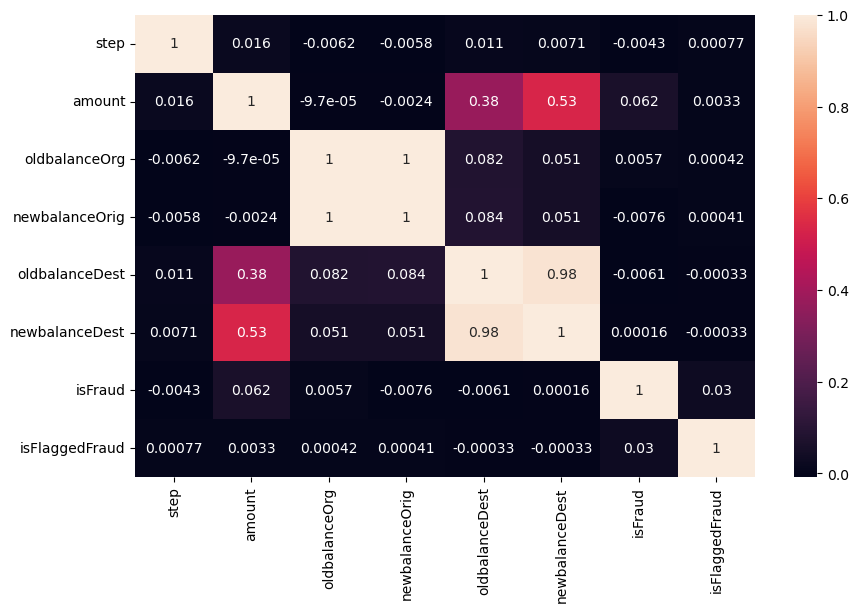

In [10]:
corr=df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

# 
NUMBER OF LEGIT AND FRAUD TRANSACTIONS

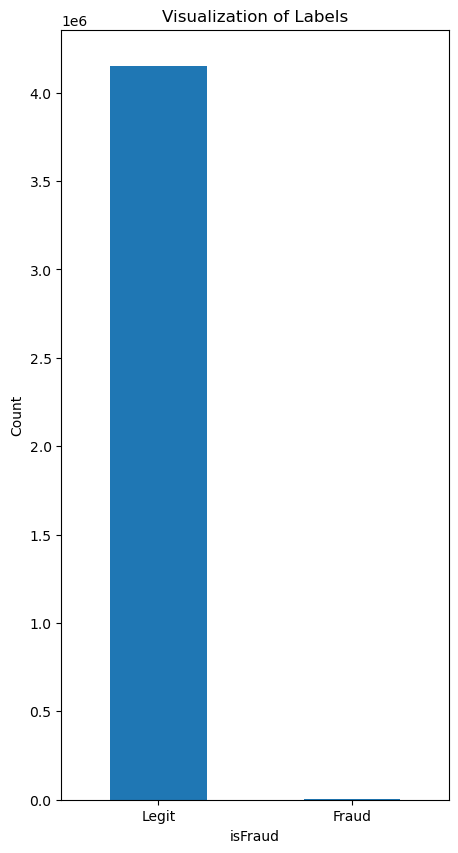

In [11]:
plt.figure(figsize=(5,10))
labels = ["Legit", "Fraud"]
count_classes = df.value_counts(df['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

# PROBLEM SOLVING

In [12]:
new_df=df.copy()
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


# 
LABEL ENCODING

In [13]:
objList = new_df.select_dtypes(include = "object").columns
print (objList)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    new_df[feat] = le.fit_transform(new_df[feat].astype(str))

print (new_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4152610 entries, 0 to 4152609
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(7), int32(3), int64(1)
memory usage: 301.0 MB
None


In [15]:
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,495166,170136.0,160296.36,1082372,0.0,0.0,0.0,0.0
1,1,3,1864.28,1430109,21249.0,19384.72,1129190,0.0,0.0,0.0,0.0
2,1,4,181.00,654739,181.0,0.00,286415,0.0,0.0,1.0,0.0
3,1,1,181.00,3805698,181.0,0.00,255139,21182.0,0.0,1.0,0.0
4,1,3,11668.14,2250278,41554.0,29885.86,539374,0.0,0.0,0.0,0.0


# 
MULTICOLINEARITY

In [16]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):
    if df.isnull().values.any():
        df = df.fillna(df.mean()) 
    if np.isinf(df.values).any():
        df = df.replace([np.inf, -np.inf], np.nan)
        df = df.fillna(df.mean()) 
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return vif
vif_result = calc_vif(new_df)
print(vif_result)

DataFrame contains NaNs. Handling missing values...
         variables         VIF
0             step    2.913832
1             type    4.514439
2           amount    4.597364
3         nameOrig    2.818209
4    oldbalanceOrg  788.567405
5   newbalanceOrig  798.156250
6         nameDest    3.303434
7   oldbalanceDest   81.072788
8   newbalanceDest   96.444079
9          isFraud    1.141746
10  isFlaggedFraud    1.000992


In [17]:
new_df['Actual_amount_orig'] = new_df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
new_df['Actual_amount_dest'] = new_df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
new_df['TransactionPath'] = new_df.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

new_df = new_df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

calc_vif(new_df)

DataFrame contains NaNs. Handling missing values...


,variables,VIF
0,type,2.722181
1,amount,4.307832
2,isFraud,1.136015
3,isFlaggedFraud,1.000984
4,Actual_amount_orig,1.362695
5,Actual_amount_dest,4.298552
6,TransactionPath,2.723816


<Axes: >

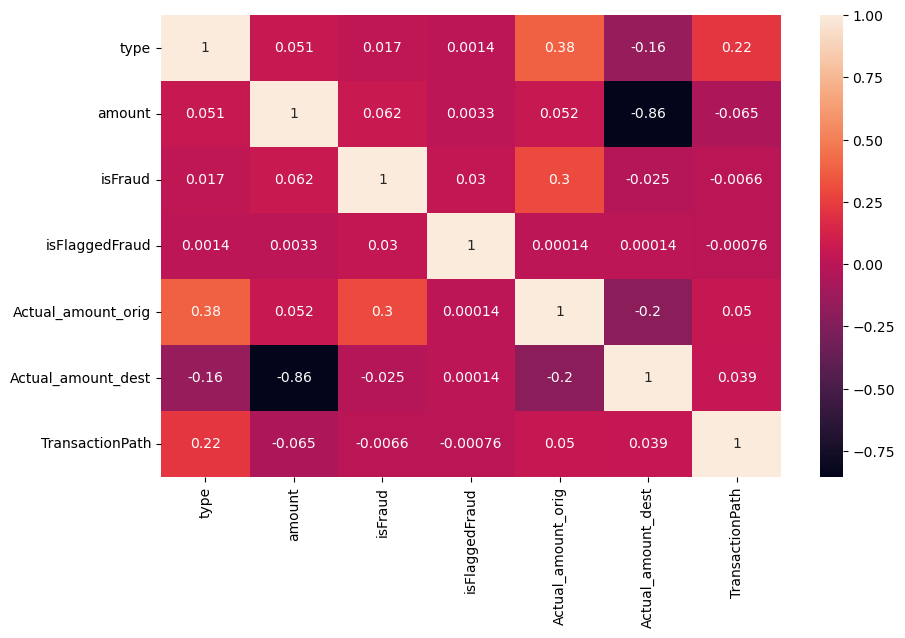

In [18]:
corr=new_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

# MODEL BUILDING

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# 
NORMALIZING (SCALING) AMOUNT

In [20]:
scaler = StandardScaler()
new_df["NormalizedAmount"] = scaler.fit_transform(new_df["amount"].values.reshape(-1, 1))
new_df.drop(["amount"], inplace= True, axis= 1)

Y = new_df["isFraud"]
X = new_df.drop(["isFraud"], axis= 1)

# TRAIN-TEST SPLIT

In [21]:
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (2906827, 6)
Shape of X_test:  (1245783, 6)


# 
MODEL TRAINIG

In [22]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

if np.isnan(Y_test).any():
    not_nan_mask = ~np.isnan(Y_test)
    X_test = X_test[not_nan_mask]
    Y_test = Y_test[not_nan_mask]

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred_dt = decision_tree.predict(X_test)

decision_tree_score = decision_tree.score(X_test, Y_test) * 100
print(f"Decision Tree Accuracy: {decision_tree_score:.2f}%")

random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, Y_train)

Y_pred_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, Y_test) * 100


Y_test contains NaNs. Handling missing values...
Decision Tree Accuracy: 99.95%


# EVALUATION

In [23]:
print("Decision Tree Score: ", decision_tree_score)
print("Random Forest Score: ", random_forest_score)

Decision Tree Score:  99.94541581111302
Random Forest Score:  99.97126302996833


In [24]:
print("TP,FP,TN,FN - Decision Tree")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_dt).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

print("----------------------------------------------------------------------------------------")

# key terms of Confusion Matrix - RF

print("TP,FP,TN,FN - Random Forest")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_rf).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

TP,FP,TN,FN - Decision Tree
True Positives: 643
False Positives: 357
True Negatives: 1244459
False Negatives: 323
----------------------------------------------------------------------------------------
TP,FP,TN,FN - Random Forest
True Positives: 648
False Positives: 40
True Negatives: 1244776
False Negatives: 318


In [25]:
confusion_matrix_dt = confusion_matrix(Y_test, Y_pred_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt,)

print("----------------------------------------------------------------------------------------")

# confusion matrix - RF

confusion_matrix_rf = confusion_matrix(Y_test, Y_pred_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Decision Tree
[[1244459     357]
 [    323     643]]
----------------------------------------------------------------------------------------
Confusion Matrix - Random Forest
[[1244776      40]
 [    318     648]]


In [26]:
classification_report_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)

print("----------------------------------------------------------------------------------------")

# classification report - RF

classification_report_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report - Random Forest")
print(classification_report_rf)

Classification Report - Decision Tree
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1244816
         1.0       0.64      0.67      0.65       966

    accuracy                           1.00   1245782
   macro avg       0.82      0.83      0.83   1245782
weighted avg       1.00      1.00      1.00   1245782

----------------------------------------------------------------------------------------
Classification Report - Random Forest
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1244816
         1.0       0.94      0.67      0.78       966

    accuracy                           1.00   1245782
   macro avg       0.97      0.84      0.89   1245782
weighted avg       1.00      1.00      1.00   1245782



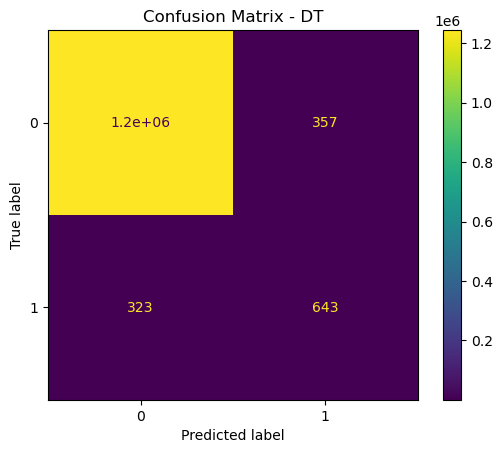

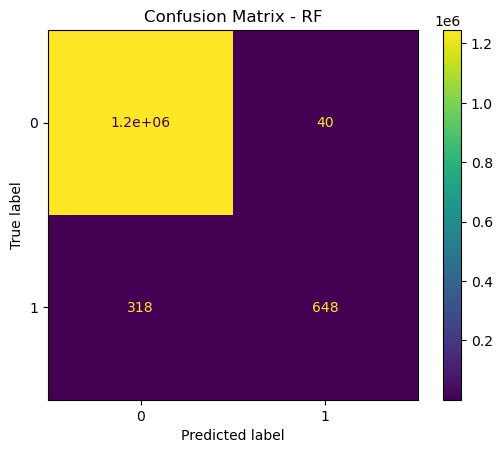

In [27]:

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt)
disp.plot()
plt.title('Confusion Matrix - DT')
plt.show()

# visualising confusion matrix - RF
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf)
disp.plot()
plt.title('Confusion Matrix - RF')
plt.show()

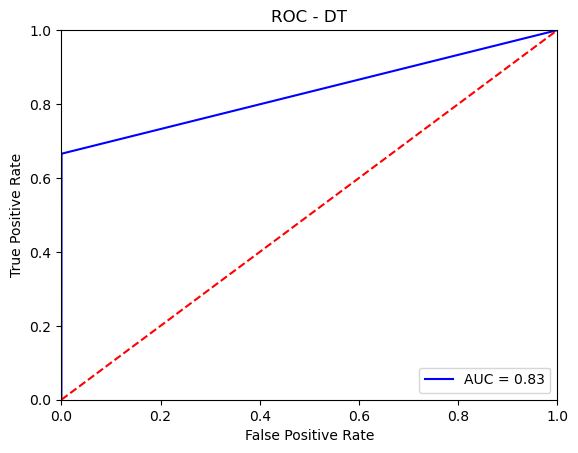

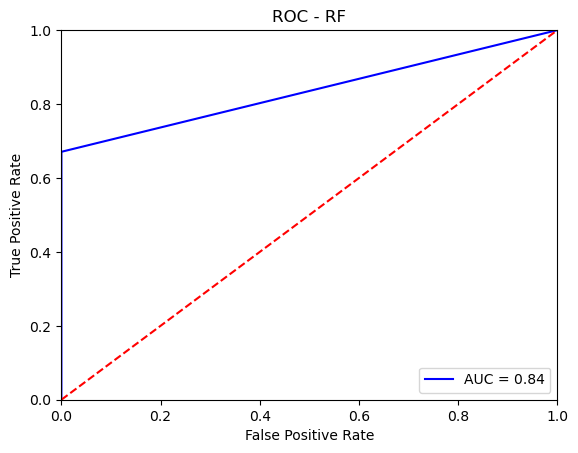

In [28]:

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_dt)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC ROC - RF
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_rf)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# CONCLUSION

We have seen that Accuracy of both Random Forest and Decision Tree is equal, although teh precision of Random Forest is more. In a fraud detection model, Precision is highly important because rather than predicting normal transactions correctly we want Fraud transactions to be predicted correctly and Legit to be left off.If either of the 2 reasons are not fulfiiled we may catch the innocent and leave the culprit.
This is also one of the reason why Random Forest and Decision Tree are used unstead of other algorithms.


Also the reason I have chosen this model is because of highly unbalanced dataset (Legit: Fraud :: 99.87:0.13). Random forest makes multiple decision trees which makes it easier (although time taking) for model to understand the data in a simpler way since Decision Tree makes decisions in a boolean way.


Models like XGBoost, Bagging, ANN, and Logistic Regression may give good accuracy but they won't give good precision and recall values.

What are the key factors that predict fraudulent customer?

   1.The source of request is secured or not ?
   2.Is the name of organisation asking for money is legit or not ?
   3.Transaction history of vendors.
   
What kind of prevention should be adopted while company update its infrastructure?

   1.Use smart vertified apps only.
   2.Browse through secured websites.
   3.Use secured internet connections (USE VPN).
   4.Keep your mobile and laptop security updated.
   5.Don't respond to unsolicited calls/SMS(s/E-mails.
   6.If you feel like you have been tricked or security compromised, contact your bank immidiately.


Assuming these actions have been implemented, how would you determine if they work?

   1.Bank sending E-statements.
   2.Customers keeping a check of their account activity.
   3.Always keep a log of your payments.